In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
# z0 (k01) ensemble average
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [5]:
# Load the area data
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_z0avg['xt_ocean'],'yt_ocean':ds_z0avg['yt_ocean']})

In [68]:
def year_comp(plot, minLat, maxLat, cont1, cont2, cont3):
    
    years = np.arange(1990, 2110, 10)
    colors = ['khaki','limegreen','orange','teal','mediumpurple','slategray','indigo','palegreen','turquoise','pink','navy']
    colorblue = ['turquoise','darkcyan','powderblue','deepskyblue','royalblue','navy','slategray','blue']
    colortab = ['tab:blue','tab:orange','tab:green','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','pink','navy','darkgreen']
    
    ds_lim = ds_z0avg.sel(yt_ocean=slice(minLat,maxLat))
    oceanmask = np.isfinite(ds_z0avg['MI'].sel(time='1950-01-16',yt_ocean=slice(minLat,maxLat)).squeeze())
    area_lim = area.sel(yt_ocean=slice(minLat,maxLat))
    area_masked = area_lim.where(oceanmask,np.nan)
    
    i = 0
    for year in years:
        ds_year = ds_lim.sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))
        mean_year = (ds_year['MI']*area_masked).sum(['xt_ocean','yt_ocean'])/(area_masked.sum(['xt_ocean','yt_ocean']))
        plot.plot(np.unique(mean_year['time.month']),mean_year.groupby('time.month').mean(),color=colortab[i],label=str(year))
        i += 1
    plot.legend()
    if cont1 == True:
        plot.axhline(y=1.0, xmin=0,xmax=1,color='red',dashes=[6,2])
    if cont2 == True:
        plot.axhline(y=2.0, xmin=0,xmax=1,color='orange',dashes=[6,2])
    if cont3 == True:
        plot.axhline(y=3.0, xmin=0,xmax=1,color='yellow',dashes=[6,2])
    plot.set_ylabel('metabolic index')
    plot.set_xlabel('month')
    plot.set_title('Mean Metabolic Index, '+str(minLat)+ ' to '+str(maxLat)+ ', by Year')

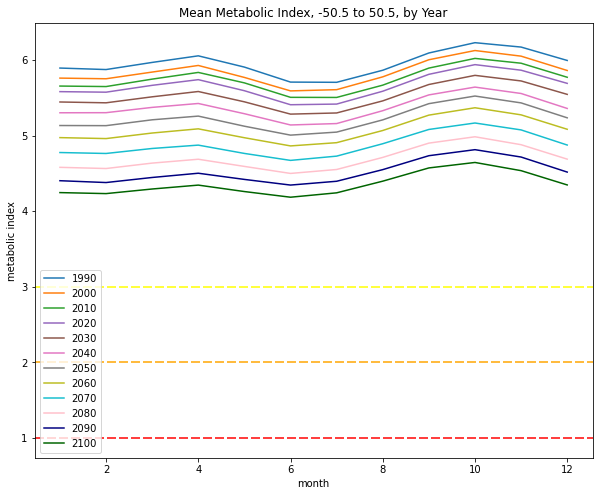

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
year_comp(ax, -50.5, 50.5, True, True, True)

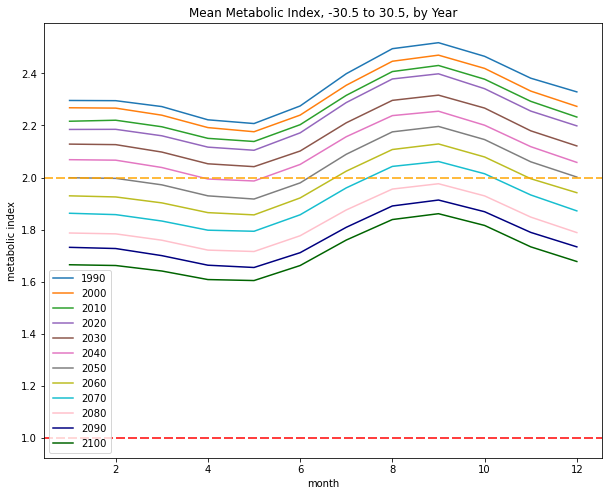

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
year_comp(ax, -30.5, 30.5, True, True, False)

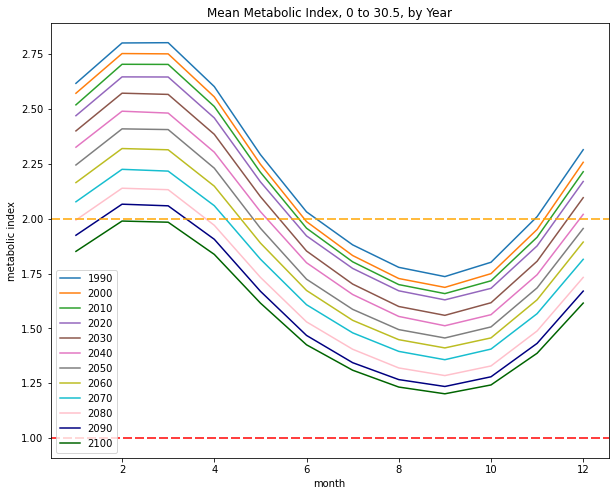

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
year_comp(ax, 0, 30.5, True, True, False)

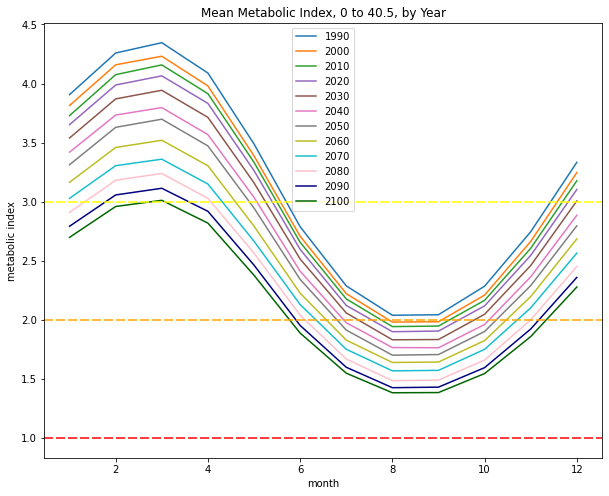

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
year_comp(ax, 0, 40.5, True, True, True)

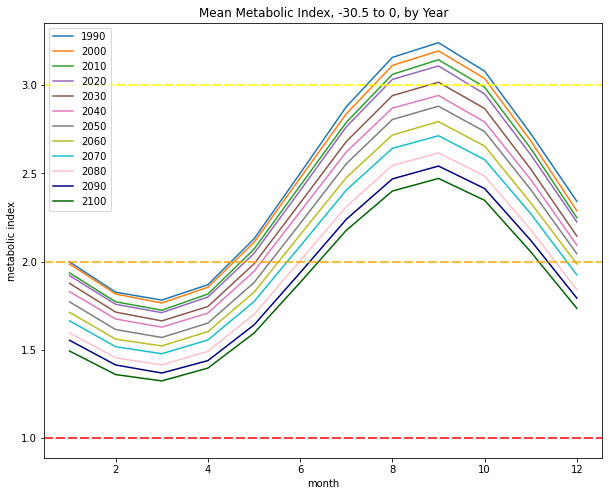

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
year_comp(ax, -30.5, 0, True, True, True)

(0.9, 3.4)

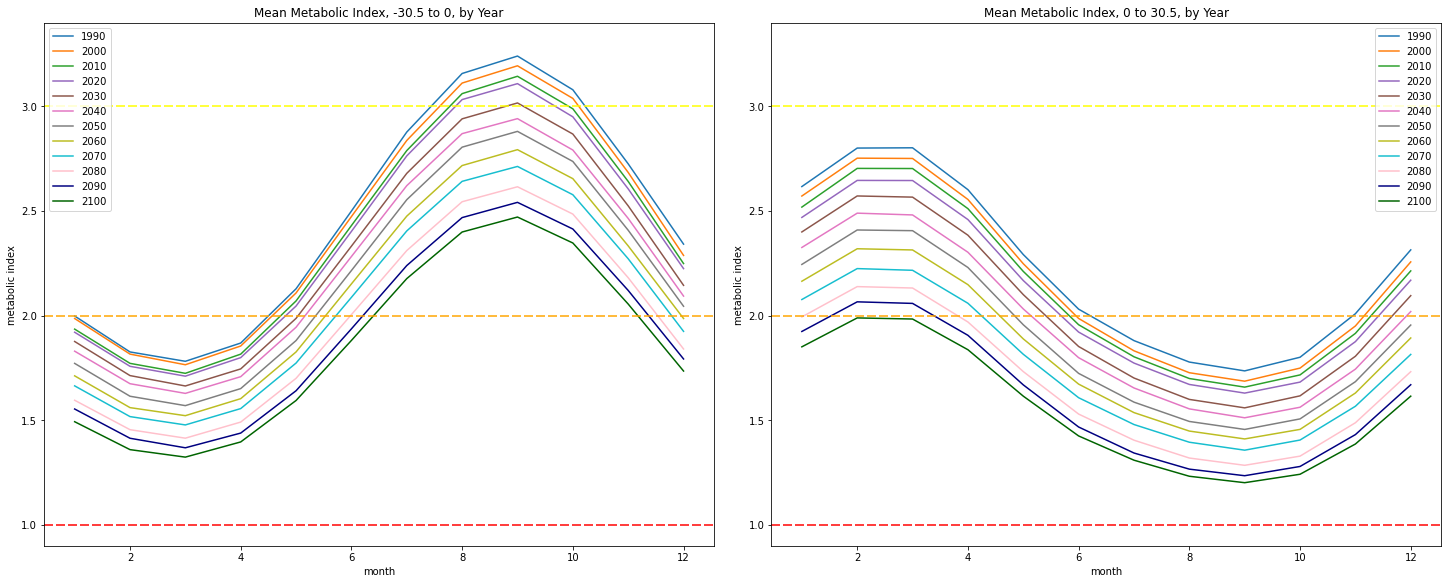

In [49]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -30.5, 0, True, True, True)
ax0.set_ylim(0.9,3.4)
year_comp(ax1, 0, 30.5, True, True, True)
ax1.set_ylim(0.9,3.4)

(1.2, 5.0)

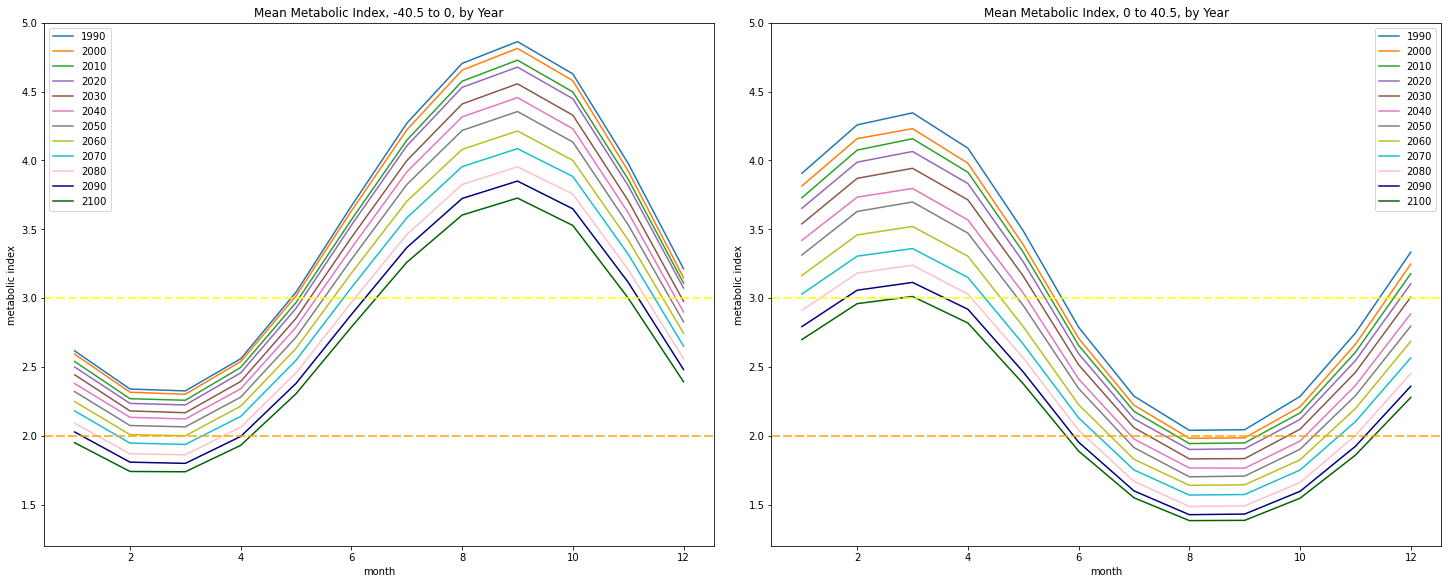

In [52]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -40.5, 0, True, True, True)
ax0.set_ylim(1.2,5.0)
year_comp(ax1, 0, 40.5, True, True, True)
ax1.set_ylim(1.2,5.0)

(0.9, 2.4)

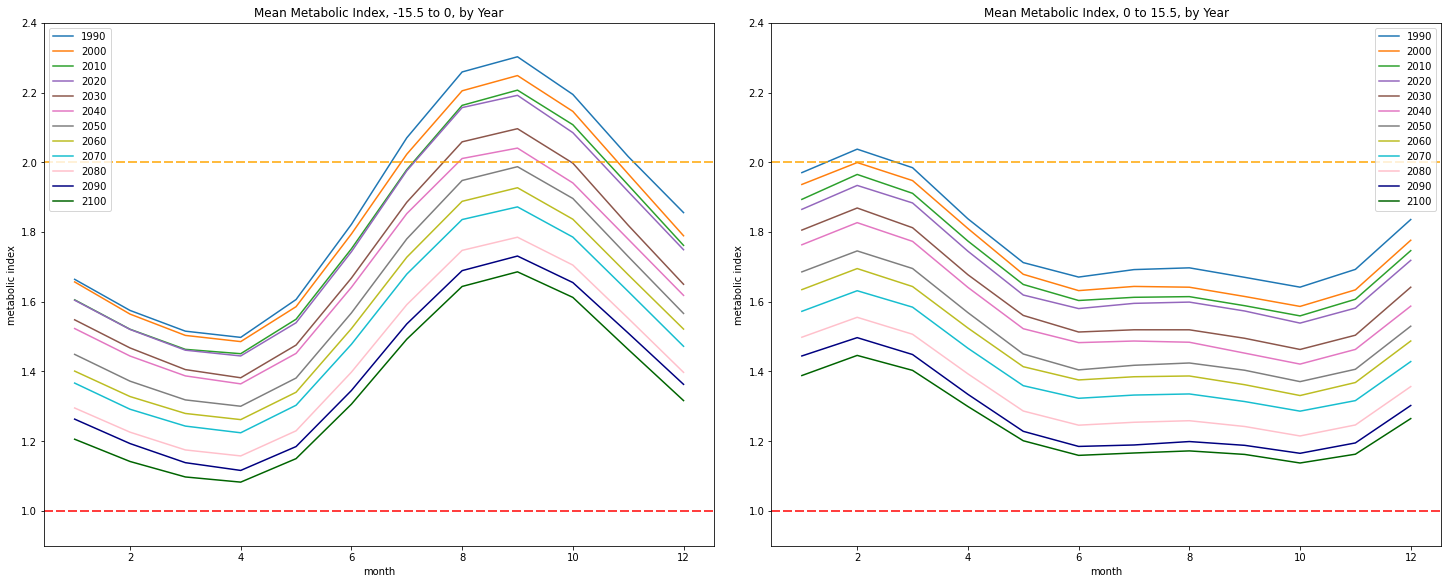

In [55]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -15.5, 0, True, True, False)
ax0.set_ylim(0.9,2.4)
year_comp(ax1, 0, 15.5, True, True, False)
ax1.set_ylim(0.9,2.4)

(1.5, 9.0)

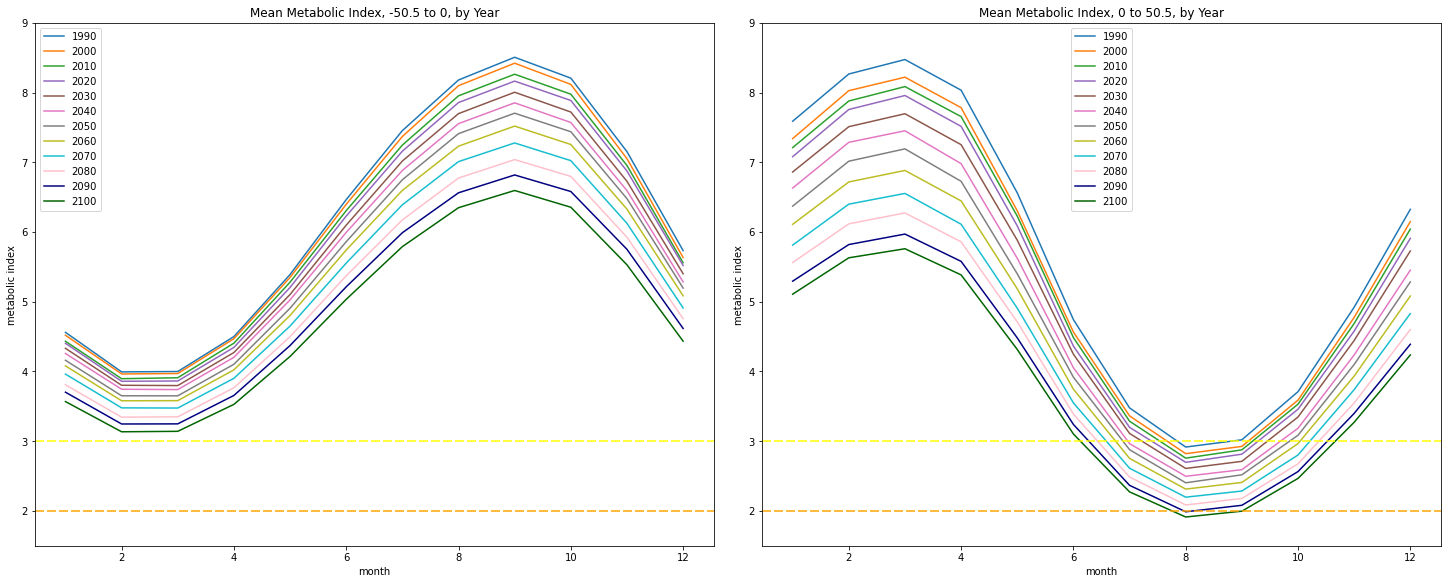

In [59]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -50.5, 0, False, True, True)
ax0.set_ylim(1.5,9)
year_comp(ax1, 0, 50.5, False, True, True)
ax1.set_ylim(1.5,9)

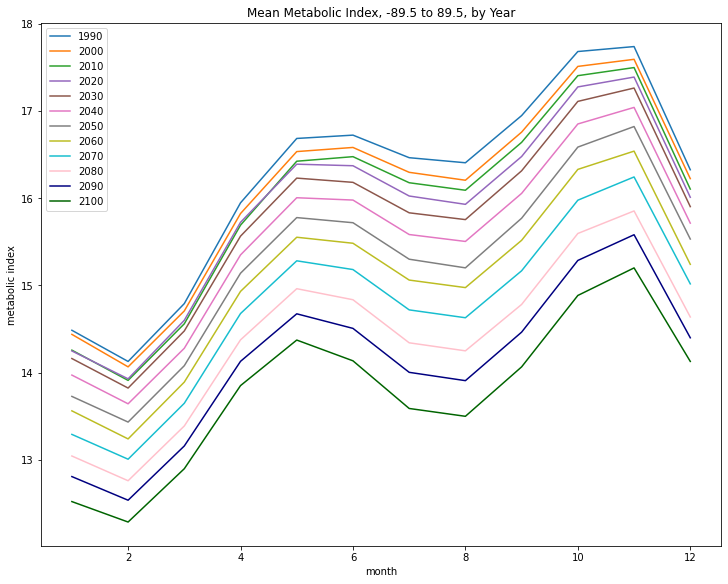

In [60]:
fig, ax = plt.subplots(figsize=(10,8),constrained_layout=True)
year_comp(ax, -89.5, 89.5, False, False, False)

(7.5, 22.0)

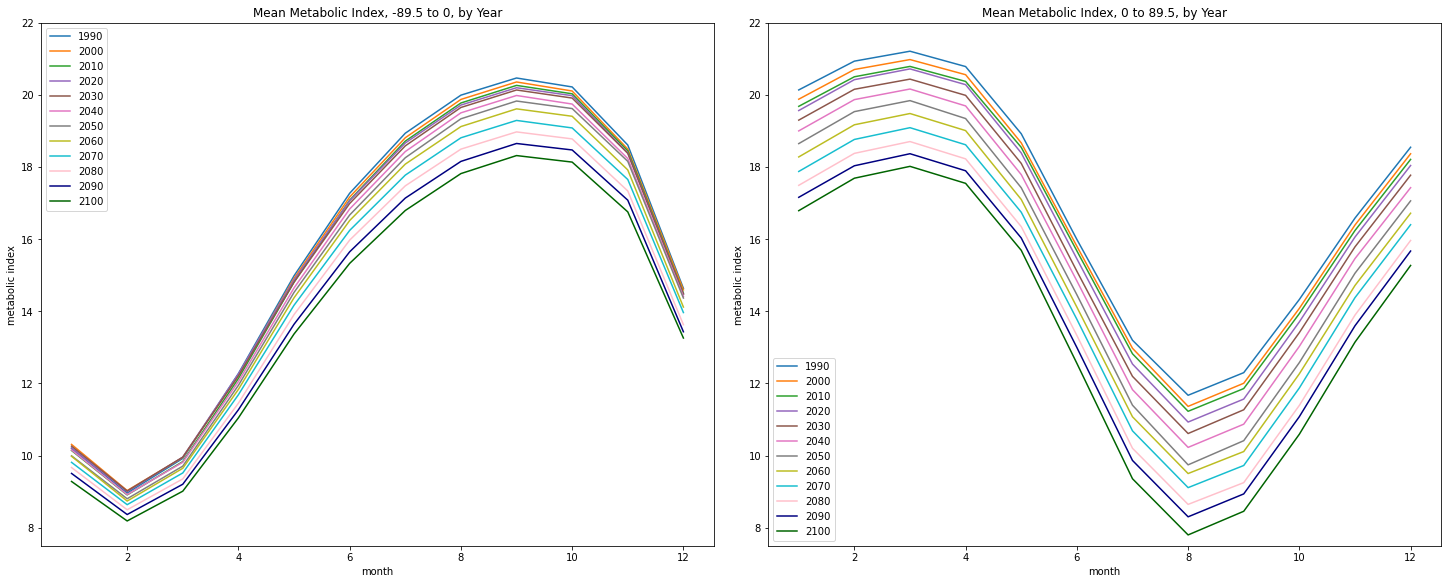

In [62]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
year_comp(ax0, -89.5, 0, False, False, False)
ax0.set_ylim(7.5,22)
year_comp(ax1, 0, 89.5, False, False, False)
ax1.set_ylim(7.5,22)